In [23]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('student-marks-prediction')
jovian.set_colab_id('1J9O7eF8hPGmw5M5773bU7LzMSkmbWHva')

In [24]:
!pip install jovian --upgrade --quiet

## Importing all the packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as F

## Now we will import the data and convert it to PyTorch tensors

In [5]:
hours = np.array([[2.5000], [5.1000], [3.2000], [8.5000], [3.5000], [1.5000], [9.2000], [5.5000], [8.3000],
        [2.7000], [7.7000], [5.9000], [4.5000], [3.3000], [1.1000], [8.9000], [2.5000], [1.9000],
        [6.1000], [7.4000], [2.7000], [4.8000], [3.8000], [6.9000], [7.8000]], dtype='float32')

marks = np.array([[21], [47], [27], [75], [30], [20], [88], [60], [81], [25], [85], [62], [41], [42], [17], [95], [30], [24], [67], [69], [30], [54], [35], [76], [86]], dtype='float32')

hours = torch.from_numpy(hours)
marks = torch.from_numpy(marks)

print(hours)
print(marks)

tensor([[2.5000],
        [5.1000],
        [3.2000],
        [8.5000],
        [3.5000],
        [1.5000],
        [9.2000],
        [5.5000],
        [8.3000],
        [2.7000],
        [7.7000],
        [5.9000],
        [4.5000],
        [3.3000],
        [1.1000],
        [8.9000],
        [2.5000],
        [1.9000],
        [6.1000],
        [7.4000],
        [2.7000],
        [4.8000],
        [3.8000],
        [6.9000],
        [7.8000]])
tensor([[21.],
        [47.],
        [27.],
        [75.],
        [30.],
        [20.],
        [88.],
        [60.],
        [81.],
        [25.],
        [85.],
        [62.],
        [41.],
        [42.],
        [17.],
        [95.],
        [30.],
        [24.],
        [67.],
        [69.],
        [30.],
        [54.],
        [35.],
        [76.],
        [86.]])


## Now We'll create a `TensorDataset`, which allows access to rows from `hours` and `marks` as tuples

In [6]:
train_ds = TensorDataset(hours, marks)
train_ds[0:10]

(tensor([[2.5000],
         [5.1000],
         [3.2000],
         [8.5000],
         [3.5000],
         [1.5000],
         [9.2000],
         [5.5000],
         [8.3000],
         [2.7000]]), tensor([[21.],
         [47.],
         [27.],
         [75.],
         [30.],
         [20.],
         [88.],
         [60.],
         [81.],
         [25.]]))

## Now we will visualize the data to see if there is any linear relation between `hours` and `marks`.

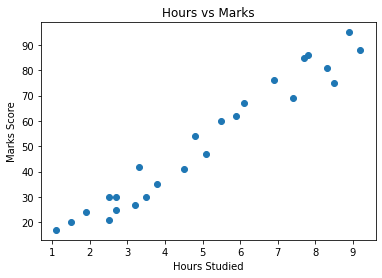

In [7]:
plt.scatter(hours, marks)
plt.title("Hours vs Marks")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Score")
plt.show()

So we can see there is a linear relation between the study hours and the marks scored. Now we can perform `Linear regression` using `Gradient descent` algorithm for predicting.

## We'll also create a `DataLoader`, which can split the data into batches of a predefined size while training. It also provides other utilities like shuffling and random sampling of the data.

In [8]:
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [9]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[8.3000],
        [2.5000],
        [9.2000],
        [6.1000],
        [1.5000]])
tensor([[81.],
        [30.],
        [88.],
        [67.],
        [20.]])


In each iteration, the data loader returns one batch of data with the given batch size. If `shuffle` is set to `True`, it shuffles the training data before creating batches. Shuffling helps randomize the input to the optimization algorithm, leading to a faster reduction in the loss.

## Now we will define our model using `nn.Linear` class from PyTorch which will give us weights and biases

In [10]:
model = nn.Linear(1, 1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.7162]], requires_grad=True)
Parameter containing:
tensor([-0.4736], requires_grad=True)


We can use the model to generate predictions in the same way as before.

In [11]:
preds = model(hours)
preds

tensor([[-2.2642],
        [-4.1264],
        [-2.7656],
        [-6.5617],
        [-2.9805],
        [-1.5480],
        [-7.0630],
        [-4.4129],
        [-6.4184],
        [-2.4075],
        [-5.9887],
        [-4.6994],
        [-3.6967],
        [-2.8372],
        [-1.2615],
        [-6.8481],
        [-2.2642],
        [-1.8345],
        [-4.8427],
        [-5.7738],
        [-2.4075],
        [-3.9116],
        [-3.1953],
        [-5.4157],
        [-6.0603]], grad_fn=<AddmmBackward>)

## Loss Function
Now we will define a loss function for calculating the loss and will try further to twicking the weights and biases for seeing a decrease in the loss

In [12]:
loss_fn = F.mse_loss

In [13]:
loss = loss_fn(model(hours), marks)
print(loss)

tensor(3787.7769, grad_fn=<MseLossBackward>)


We will now use a optimizer called `optim.SGD` for manipulating the weights and biases. SGD is short for "stochastic gradient descent". The term _stochastic_ indicates that samples are selected in random batches instead of as a single group.

In [14]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

## Train the model

We are now ready to train the model. We'll follow the below steps to implement gradient descent:

1. Generate predictions

2. Calculate the loss

3. Compute gradients w.r.t the weights and biases

4. Adjust the weights by subtracting a small quantity proportional to the gradient

5. Reset the gradients to zero

Let's define a utility function `fit` that trains the model for a given number of epochs.

In [15]:
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 100 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [16]:
fit(1500, model, loss_fn, opt, train_dl)

Epoch [100/1500], Loss: 2734.6597
Epoch [200/1500], Loss: 814.2699
Epoch [300/1500], Loss: 580.7731
Epoch [400/1500], Loss: 397.4438
Epoch [500/1500], Loss: 129.5323
Epoch [600/1500], Loss: 90.6492
Epoch [700/1500], Loss: 137.5472
Epoch [800/1500], Loss: 49.3733
Epoch [900/1500], Loss: 71.3739
Epoch [1000/1500], Loss: 25.5163
Epoch [1100/1500], Loss: 41.7884
Epoch [1200/1500], Loss: 28.8677
Epoch [1300/1500], Loss: 31.7200
Epoch [1400/1500], Loss: 47.0958
Epoch [1500/1500], Loss: 26.8738


We have trained our model for 1500 epochs and we got the Loss value 26.87 which is pretty good compared to the first loss value

### Now we will see how good our model has performed and we will try to predict if a student studies for `9.25 hours` then what will be the score.

In [18]:
preds = model(hours)
preds

tensor([[25.9773],
        [51.6701],
        [32.8946],
        [85.2683],
        [35.8591],
        [16.0955],
        [92.1856],
        [55.6228],
        [83.2919],
        [27.9537],
        [77.3628],
        [59.5756],
        [45.7410],
        [33.8828],
        [12.1428],
        [89.2210],
        [25.9773],
        [20.0482],
        [61.5519],
        [74.3983],
        [27.9537],
        [48.7055],
        [38.8237],
        [69.4574],
        [78.3510]], grad_fn=<AddmmBackward>)

In [19]:
marks

tensor([[21.],
        [47.],
        [27.],
        [75.],
        [30.],
        [20.],
        [88.],
        [60.],
        [81.],
        [25.],
        [85.],
        [62.],
        [41.],
        [42.],
        [17.],
        [95.],
        [30.],
        [24.],
        [67.],
        [69.],
        [30.],
        [54.],
        [35.],
        [76.],
        [86.]])

Let's see for 9.25 hours how much a student scores

In [20]:
model(torch.tensor([[9.2500]]))

tensor([[92.6797]], grad_fn=<AddmmBackward>)

The predicted score is 92.67

In [21]:
jovian.commit(project='student-marks-prediction')

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/anirbanghoshal990/student-marks-prediction


'https://jovian.ai/anirbanghoshal990/student-marks-prediction'

In [22]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/anirbanghoshal990/student-marks-prediction


'https://jovian.ai/anirbanghoshal990/student-marks-prediction'

In [26]:
import jovian
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/anirbanghoshal990/student-marks-prediction


'https://jovian.ai/anirbanghoshal990/student-marks-prediction'